Question 1: What is Boosting in Machine Learning? Explain how it improves weak
learners.

Answer: Boosting is an ensemble learning technique in machine learning that aims to improve the performance of weak learners (models that perform slightly better than base learners). The key idea behind boosting is to combine multiple weak models sequentially so that each new model focuses more on the mistakes made by the previous models. This results in a strong predictive model with higher accuracy and lower error.

Working of boosting:
1. Start with a base weak learner like Decision Tree Stumps. Initially all data points are assigned equal weights.

2. After the first model is trained, the algorithm identifies the misclassified datapoints. Higher weights are assigned to these misclassified points, so the next learner pays more attention to them.
This is called sequential learning.

3. Each weak learner is assigned a weight based on its accuracy. The final model is a weighted combination of all weak learners.

4. Now, its time for the final prediction1:
Majority vote or weighted vote is used for classification.
Average of weight is used for regression.

Boosting combines many such learners in sequence to minimize bias and variance.
By focusing on hard-to-classify cases, boosting gradually reduces errors.
The final model is far stronger than any individual weak learner.

Question 2: What is the difference between AdaBoost and Gradient Boosting in terms of how models are trained?

Answer:
AdaBoost: 1. An additive model where shortcomings of previous models are identified by high-weight data points.
2. The tree usually grown as decision tree stumps.
3. Each classifier has different weight assigned to the final prediction baased on its performance.
4. It gives weights to both classifiers and observations thus capturing maximum variance within data.

Gradient Boost: 1. An additive model where shortcoming of previous models are identified by the gradient.
2. The trees are grown to a greater depth usually ranging from 8 to 32 terminal nodes.
3. All classifiers are  weighted equally and their predictive capacity is restricted with learning rate to increase accuracy.
4. It bulds trees on previous classifier's residuals thus capturing variance in data.

Question 3: How does regularization help in XGBoost?

Answer: Regularization in XGBoost is a powerful technique to enhance model performance by preventing overfitting.
In other words, regularization is a method used to prevent overfitting by simplifying the model.

1. Reducing the Number of Estimators:
Reducing the number of estimators can prevent the model from becoming overly complex. Two key strategies include:

n_estimators: Setting a lower number of trees can help prevent the model from learning the noise in the training data. High value of n_estimators will lead to overfitting and low value may result in underfitting.

Early Stopping: This technique halts the training process when the performance on a validation set stops improving, preventing overfitting.

2. Use Simpler Trees:
Simplifying the structure of each tree can also help regularize the model. Key parameters include:

gamma: Minimum loss reduction required to make a further partition on a leaf node. Higher values lead to more conservative models.

3. Sampling:
Sampling involves training the model on a subset of the data, which can reduce overfitting by introducing randomness.

subsample: The percentage of training data used for training each tree. Lower values can prevent overfitting. Subsampling makes each decision tree an expert on a subset of the data, following the “wisdom of the crowd” principle. Values in the range of 0.5 to 0.8 generally give good results, depending on the data.

colsample: The percentage of features used for training each tree. This can also be used to introduce randomness and prevent overfitting. colsample has the following three types, and their values range from 0 to 1. These are shown below in increasing order of the randomness they introduce.

4. Shrinkage:
Shrinkage reduces the influence of each individual tree, making the model more robust:

learning_rate (Shrinkage): Reduces the impact of each tree. Lower values means the model builds more trees but is less likely to overfit. 0.3 is a suitable learning rate for many models.

lambda and alpha: L2 (Ridge) and L1 (Lasso) regularization terms that penalize large coefficients.

Question 4: Why is CatBoost considered efficient for handling categorical data?

Answer: CatBoost (Categorical Boosting) is a gradient boosting algorithm developed by Yandex that is especially designed to handle categorical variables efficiently, without requiring extensive preprocessing such as one-hot encoding or label encoding. This makes it highly effective and user-friendly in real-world datasets where categorical features are common.

Most machine learning algorithms like XGBoost cannot directly work with categorical variables.Methods like OHE or Label Encoding are typical methods which are used, the methods can be inefficient and may lead to loss of information or high computational cost.

CatBoost introduces novel techniques to directly encode categorical features without heavy preprocessing:

1. Target-Based Statistics (Ordered Target Encoding):
Instead of simple label encoding, CatBoost replaces a categorical feature value with a statistic derived from the target variable (e.g., mean target value for that category).
- To avoid target leakage, CatBoost uses ordered boosting:
When encoding, it only uses data from previous rows (not future rows) in a random permutation of the dataset.
This ensures fairness and prevents overfitting.

2. Symmetric Tree Growing:
Unlike traditional gradient boosting, CatBoost grows balanced, symmetric trees.
This reduces variance and improves generalization, especially with categorical splits.4

Question 5: What are some real-world applications where boosting techniques are preferred over bagging methods?

Answer: The real world application where boosting techniques are preferred are:

1. Finance & Banking (Fraud Detection / Credit Scoring):
- Fraudulent transactions are rare (highly imbalanced dataset).

- Boosting algorithms like XGBoost and LightGBM are widely used because they can handle:
    - Class imbalance with weighting

    - Subtle, complex patterns in data

Example: Detecting fraudulent credit card transactions or predicting loan default.

2. Healthcare (Disease Prediction & Medical Diagnosis):
- Patient datasets often contain imbalanced labels (e.g., fewer patients with rare diseases).
- Boosting improves recall and precision, ensuring fewer false negatives.
Example: Predicting whether a patient has cancer from diagnostic data using Gradient Boosting.

3. E-commerce & Marketing (Customer Behavior Prediction):
- Boosting is preferred for predicting customer churn, product recommendation, and campaign response.
- Customer behavior is often non-linear and requires high predictive accuracy.
Example: XGBoost used by online retailers to predict which customers are likely to purchase or leave.

4. Cybersecurity (Intrusion Detection Systems):
- Network traffic datasets are often imbalanced (few attacks vs. many normal connections).
- Boosting effectively improves detection of rare attack patterns.



In [22]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.1 MB/s eta 0:00:00


In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer, fetch_california_housing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import accuracy_score, mean_squared_error, classification_report, confusion_matrix, mean_absolute_error, r2_score
import xgboost as xgb
from catboost import CatBoostClassifier

In [10]:
'''Question 6: Write a Python program to:
● Train an AdaBoost Classifier on the Breast Cancer dataset
● Print the model accuracy'''

#data preprocessing
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
X = df.drop('target', axis = 1)
y = df['target']

# train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

# model_training
adb = AdaBoostClassifier()
adb.fit(x_train, y_train)

# model_evaluation
y_pred = adb.predict(x_test)
print(f"The accuracy score of the model is: {accuracy_score(y_test, y_pred)}")
print(f"The classification_report is: \n{classification_report(y_test, y_pred)}")
print(f"The confusion_matrix is: \n{confusion_matrix(y_test, y_pred)}")

The accuracy score of the model is: 0.9415204678362573
The classification_report is: 
              precision    recall  f1-score   support

           0       0.93      0.90      0.92        63
           1       0.95      0.96      0.95       108

    accuracy                           0.94       171
   macro avg       0.94      0.93      0.94       171
weighted avg       0.94      0.94      0.94       171

The confusion_matrix is: 
[[ 57   6]
 [  4 104]]


In [14]:
'''Question 7: Write a Python program to:
● Train a Gradient Boosting Regressor on the California Housing dataset
● Evaluate performance using R-squared score'''

#data preprocessing
data1 = fetch_california_housing()
X = data1.data
y = data1.target

# train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.25, random_state = 1)

# model training
gbr = GradientBoostingRegressor()
gbr.fit(X_train, Y_train)

# model evaluation
Y_pred = gbr.predict(X_test)
print(f"The R2 score of the model is: {r2_score(Y_test, Y_test)}")
print(f"The mean_squared_error is: {mean_squared_error(Y_test, Y_pred)}")
print(f"The mean absolute error is: {mean_absolute_error(Y_test, Y_pred)}")

The R2 score of the model is: 1.0
The mean_squared_error is: 0.29361794772626487
The mean absolute error is: 0.3717781854601999


In [21]:
'''Question 8: Write a Python program to:
● Train an XGBoost Classifier on the Breast Cancer dataset
● Tune the learning rate using GridSearchCV
● Print the best parameters and accuracy'''

#data preprocessing
data = load_breast_cancer()
X, y = data.data, data.target

#train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

# model training
xgb_clf = xgb.XGBClassifier()
xgb_clf.fit(x_train, y_train)
y_predict = xgb_clf.predict(x_test)
param = {"learning_rate": [0.01, 0.1, 0.3, 0.2, 0.05]}
grid_search = GridSearchCV(xgb_clf, param_grid = param, cv = 5, verbose = 2)
grid_search.fit(x_train, y_train)

# model evaluation
best_param = grid_search.best_estimator_
y_pred = best_param.predict(x_test)
print(f"The best parameter is : {best_param}")
print(f"The best score is: {grid_search.best_score_}")
print(f"The accuracy score of the model is: {accuracy_score(y_test, y_predict)}")
print(f"The accuracy score of the tuned model is: {accuracy_score(y_test, y_pred)}")

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] END .................................learning_rate=0.01; total time=   1.2s
[CV] END .................................learning_rate=0.01; total time=   0.2s
[CV] END .................................learning_rate=0.01; total time=   0.2s
[CV] END .................................learning_rate=0.01; total time=   0.2s
[CV] END .................................learning_rate=0.01; total time=   0.2s
[CV] END ..................................learning_rate=0.1; total time=   0.1s
[CV] END ..................................learning_rate=0.1; total time=   0.1s
[CV] END ..................................learning_rate=0.1; total time=   0.1s
[CV] END ..................................learning_rate=0.1; total time=   0.1s
[CV] END ..................................learning_rate=0.1; total time=   0.1s
[CV] END ..................................learning_rate=0.3; total time=   0.1s
[CV] END ..................................learni

Learning rate set to 0.006952
0:	learn: 0.6805394	total: 23.2ms	remaining: 23.2s
1:	learn: 0.6684285	total: 41.1ms	remaining: 20.5s
2:	learn: 0.6562829	total: 68.6ms	remaining: 22.8s
3:	learn: 0.6455505	total: 86.4ms	remaining: 21.5s
4:	learn: 0.6338870	total: 120ms	remaining: 24s
5:	learn: 0.6238327	total: 142ms	remaining: 23.5s
6:	learn: 0.6122896	total: 184ms	remaining: 26s
7:	learn: 0.6016062	total: 203ms	remaining: 25.2s
8:	learn: 0.5905046	total: 229ms	remaining: 25.2s
9:	learn: 0.5807428	total: 256ms	remaining: 25.3s
10:	learn: 0.5717395	total: 301ms	remaining: 27.1s
11:	learn: 0.5625888	total: 334ms	remaining: 27.5s
12:	learn: 0.5547429	total: 366ms	remaining: 27.8s
13:	learn: 0.5453778	total: 386ms	remaining: 27.2s
14:	learn: 0.5347749	total: 405ms	remaining: 26.6s
15:	learn: 0.5266194	total: 459ms	remaining: 28.2s
16:	learn: 0.5203145	total: 489ms	remaining: 28.3s
17:	learn: 0.5128301	total: 516ms	remaining: 28.1s
18:	learn: 0.5060945	total: 542ms	remaining: 28s
19:	learn: 0.

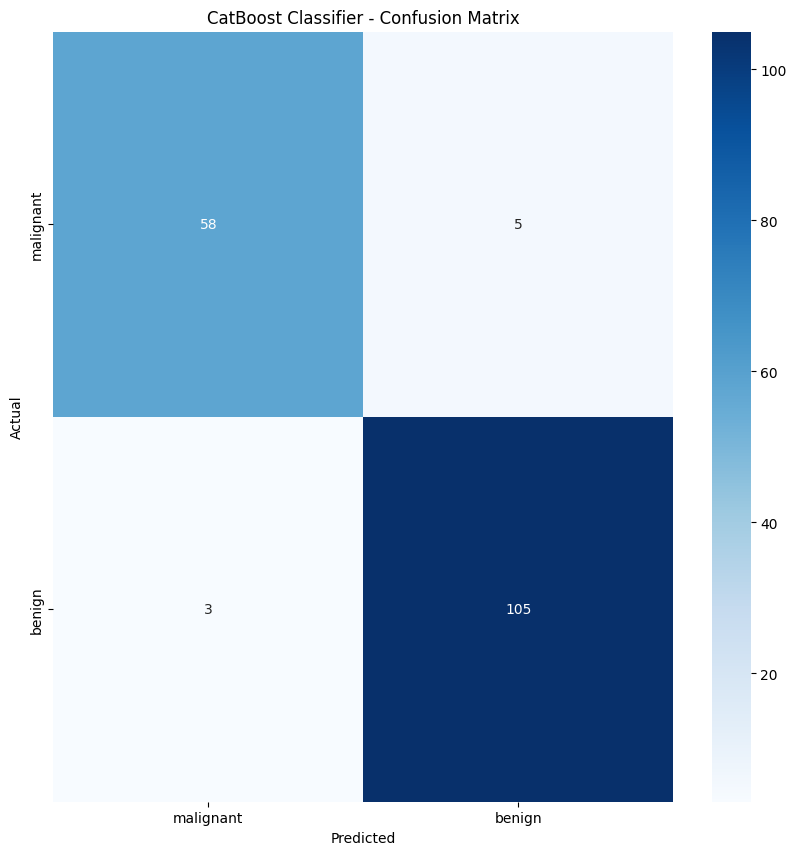

In [28]:
'''Question 9: Write a Python program to:
● Train a CatBoost Classifier
● Plot the confusion matrix using seaborn'''

# data_preprocessing
data = load_breast_cancer()
X, y = data.data, data.target

# train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

#model_training
cat_clf = CatBoostClassifier()
cat_clf.fit(x_train, y_train)

#model_evaluation
y_pred = cat_clf.predict(x_test)
print(f"The accuracy score is: {accuracy_score(y_test, y_pred)}")
print(f"The confusion matrix is : \n {confusion_matrix(y_test, y_pred)}")

# ploting the confusion matrix
plt.figure(figsize = (10, 10))
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, fmt = 'd', cmap="Blues", xticklabels=data.target_names, yticklabels=data.target_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("CatBoost Classifier - Confusion Matrix")
plt.show()

In [ ]:
'''Question 10: You're working for a FinTech company trying to predict loan default using
customer demographics and transaction behavior.
The dataset is imbalanced, contains missing values, and has both numeric and
categorical features.
Describe your step-by-step data science pipeline using boosting techniques:
● Data preprocessing & handling missing/categorical values
● Choice between AdaBoost, XGBoost, or CatBoost
● Hyperparameter tuning strategy
● Evaluation metrics you'd choose and why
● How the business would benefit from your model
Answer: -> Data Preprocessing & Handling Missing/Categorical Values:
1. Handling Missing Values:
- For numerical features, impute missing values using median/mean or advanced methods (KNN imputation).
- For categorical features, impute with mode or use a separate “missing” category.

2. Feature Encoding:
- If using XGBoost/AdaBoost → Apply One-Hot Encoding (OHE) or Target Encoding for categorical variables.
- If using CatBoost → Directly pass categorical feature indices, since CatBoost handles categorical variables natively without heavy preprocessing.

3. Feature Scaling
- Not strictly required for tree-based boosting models.
- Can apply normalization if using models like Logistic Regression for baseline comparison.

-> Choose a Boosting Algorithm:
CatBoost will be preferred because it can automate the encoding of categorical features without extensive preprocessing and hadles it  natively.
It also works well on imbalanced data with built in class weights.
Efficient and robust to overfitting as compares to AdaBoost and XGBoost.

-> Hyperparameter Tuning Strategy:
Use GridSearchCV or RandomizedSearchCV with stratified folds to tune:
- learning_rate → Controls step size of updates (e.g., 0.01, 0.05, 0.1).
- n_estimators → Number of trees (e.g., 100, 500, 1000).
- max_depth → Controls complexity of trees (e.g., 3–10).
- class_weights → To handle imbalance.
- subsample & colsample_bylevel → For regularization to prevent overfitting.

-> Evaluation metrics:
SInce it is a imbalanced classification datasets, accuracy can be misleading.
We would prefer ROC-AUC curve, precision, recall, F1-score, Confusion Matrix.

-> Business Impact
- Reduce Financial Risk: Early identification of potential defaulters → reduces loan loss.
- Improve Credit Policies: Helps refine risk-based pricing of loans.
- Operational Efficiency: Automates decision-making, reducing reliance on manual underwriting.
- Customer Retention: Helps offer flexible repayment plans to at-risk customers, improving trust.
'''